In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<span style="font-size: 30px;">**<span style="color:purple;">DATA CLEANING
</span>**</span>

In [2]:
train_data = pd.read_csv('train.csv')
train_data.head()

,label,email
0,spam,attn i am bulawa mulete jr the son of mr steve...
1,ham,That depends. How would you like to be treated...
2,ham,"Wen u miss someone, the person is definitely s..."
3,spam,Win the newest “Harry Potter and the Order of ...
4,ham,Where are you lover ? I need you ...


In [3]:
test_data = pd.read_csv('test.csv')
test_data.head()

,label,email
0,ham,Why you keeping me away like this
1,ham,neale pickett if you can spare the memory you...
2,ham,I think u have the wrong number.
3,ham,* Was thinking about chuckin ur red green n bl...
4,ham,i am trying to manage the email for a domain w...


In [4]:
train_data.isnull().sum()

label    19
email    19
dtype: int64

In [5]:
train_data.shape

(5863, 2)

In [6]:
train_data = train_data.dropna()

In [7]:
train_data.shape

(5825, 2)

In [8]:
train_data.duplicated().sum()

299

In [9]:
train_data = train_data.drop_duplicates()

In [10]:
train_data.shape

(5526, 2)

<span style="font-size: 30px;">**<span style="color:purple;">EDA
</span>**</span>

In [11]:
train_data.label.value_counts()

ham               4739
spam               786
{"mode":"full"       1
Name: label, dtype: int64

In [12]:
train_data[train_data.label == '{"mode":"full"']

,label,email
3754,"{""mode"":""full""",isActive:false}


In [13]:
train_data.shape

(5526, 2)

In [14]:
train_data = train_data[train_data.label != '{"mode":"full"']

In [15]:
train_data.shape

(5525, 2)

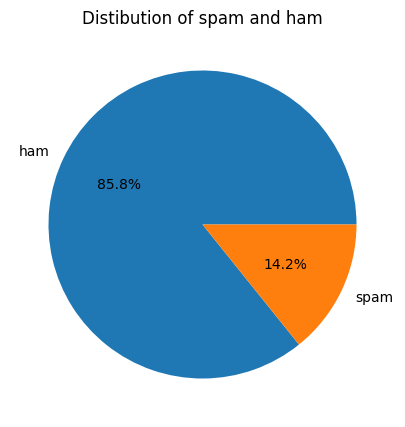

In [16]:
plt.figure(figsize=(8, 5))
plt.pie(train_data.label.value_counts(), labels = train_data.label.value_counts().index, autopct='%1.1f%%')
plt.title('Distibution of spam and ham')
plt.show()

In [17]:
train_data['length'] = train_data.email.apply(len)
train_data.sample(5)

,label,email,length
1786,ham,is there a way to look for a particular file o...,257
2595,ham,"And how you will do that, princess? :)",38
5446,spam,newsletter coach invest septembre NUMBER coach...,10293
4209,ham,URL dear garrison there are at least six plan...,1675
2748,ham,on mon NUMBER aug NUMBER jim whitehead wrote a...,330


In [18]:
import string
train_data['num_words'] = [len(list(map(lambda x: x.strip(string.punctuation), x.split()))) for x in train_data['email'].tolist()]

In [19]:
train_data.head()

,label,email,length,num_words
0,spam,attn i am bulawa mulete jr the son of mr steve...,2852,522
1,ham,That depends. How would you like to be treated...,50,10
2,ham,"Wen u miss someone, the person is definitely s...",141,25
3,spam,Win the newest “Harry Potter and the Order of ...,138,26
4,ham,Where are you lover ? I need you ...,36,9


In [20]:
import re
def sent_count(text):
        new_text = re.sub(r'[.!?]\s', r'|', text)
        sent_num = len(new_text.split('|'))
        return sent_num

In [21]:
train_data['num_sentence'] = train_data['email'].apply(sent_count)

In [22]:
train_data.head()

,label,email,length,num_words,num_sentence
0,spam,attn i am bulawa mulete jr the son of mr steve...,2852,522,1
1,ham,That depends. How would you like to be treated...,50,10,3
2,ham,"Wen u miss someone, the person is definitely s...",141,25,2
3,spam,Win the newest “Harry Potter and the Order of ...,138,26,1
4,ham,Where are you lover ? I need you ...,36,9,2


In [23]:
train_data.email[2]

'Wen u miss someone, the person is definitely special for u..... But if the person is so special, why to miss them, just Keep-in-touch gdeve..'

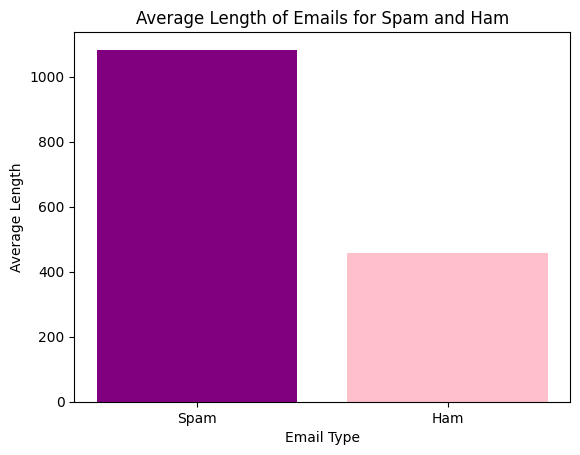

Average Length of Spam Emails: 1082.643765903308
Average Length of Ham Emails: 455.9221354716185


In [24]:
avg_length_spam = train_data[train_data['label'] == 'spam']['length'].mean()
avg_length_ham = train_data[train_data['label'] == 'ham']['length'].mean()

plt.bar(['Spam', 'Ham'], [avg_length_spam, avg_length_ham], color=['purple', 'pink'])
plt.title('Average Length of Emails for Spam and Ham')
plt.xlabel('Email Type')
plt.ylabel('Average Length')
plt.show()
print("Average Length of Spam Emails:", avg_length_spam)
print("Average Length of Ham Emails:", avg_length_ham)

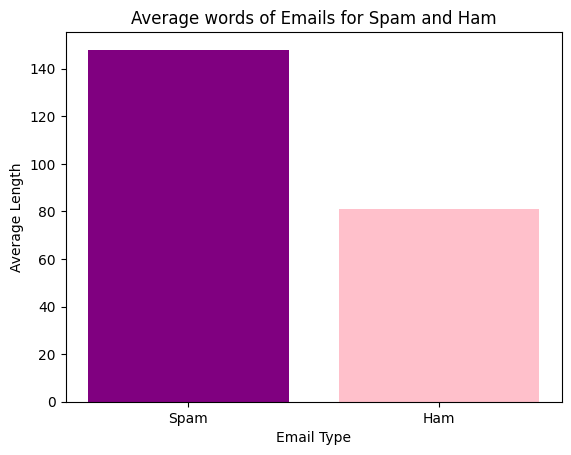

Average words of Spam Emails: 147.94274809160305
Average words of Ham Emails: 81.03819371175354


In [25]:
avg_words_spam = train_data[train_data['label'] == 'spam']['num_words'].mean()
avg_words_ham = train_data[train_data['label'] == 'ham']['num_words'].mean()

plt.bar(['Spam', 'Ham'], [avg_words_spam, avg_words_ham], color=['purple', 'pink'])
plt.title('Average words of Emails for Spam and Ham')
plt.xlabel('Email Type')
plt.ylabel('Average Length')
plt.show()
print("Average words of Spam Emails:", avg_words_spam)
print("Average words of Ham Emails:", avg_words_ham)

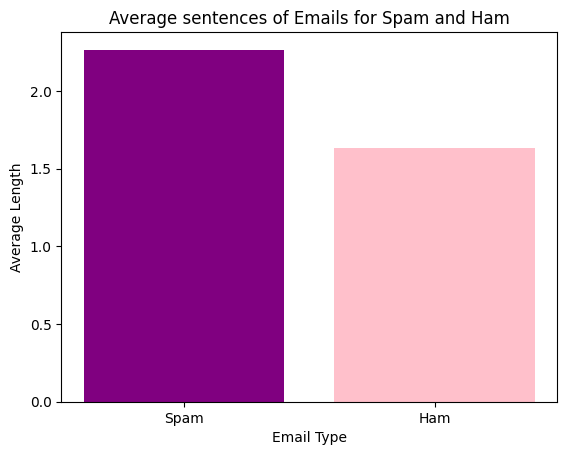

Average sentences of Spam Emails: 2.2646310432569976
Average sentences of Ham Emails: 1.6334669761553071


In [26]:
avg_sentences_spam = train_data[train_data['label'] == 'spam']['num_sentence'].mean()
avg_sentences_ham = train_data[train_data['label'] == 'ham']['num_sentence'].mean()

plt.bar(['Spam', 'Ham'], [avg_sentences_spam, avg_sentences_ham], color=['purple', 'pink'])
plt.title('Average sentences of Emails for Spam and Ham')
plt.xlabel('Email Type')
plt.ylabel('Average Length')
plt.show()
print("Average sentences of Spam Emails:", avg_sentences_spam)
print("Average sentences of Ham Emails:", avg_sentences_ham)

In [27]:
correlation_matrix = train_data[['length', 'num_words', 'num_sentence']].corr()
print("The Relationship between Features are \n",correlation_matrix )

The Relationship between Features are 
                 length  num_words  num_sentence
length        1.000000   0.729541     -0.070449
num_words     0.729541   1.000000     -0.111223
num_sentence -0.070449  -0.111223      1.000000


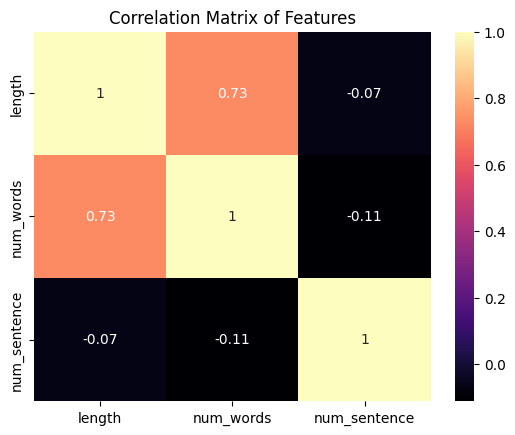

In [28]:
sns.heatmap(correlation_matrix, annot=True, cmap='magma')
plt.title('Correlation Matrix of Features')
plt.show()

<span style="font-size: 30px;">**<span style="color:purple;">DATA PREPROCESSING
</span>**</span>

In [29]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vaily\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vaily\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
train_data.head()

,label,email,length,num_words,num_sentence
0,spam,attn i am bulawa mulete jr the son of mr steve...,2852,522,1
1,ham,That depends. How would you like to be treated...,50,10,3
2,ham,"Wen u miss someone, the person is definitely s...",141,25,2
3,spam,Win the newest “Harry Potter and the Order of ...,138,26,1
4,ham,Where are you lover ? I need you ...,36,9,2


In [31]:
test_data.head()

,label,email
0,ham,Why you keeping me away like this
1,ham,neale pickett if you can spare the memory you...
2,ham,I think u have the wrong number.
3,ham,* Was thinking about chuckin ur red green n bl...
4,ham,i am trying to manage the email for a domain w...


In [32]:
train_data['prepared_text'] = train_data['email'].str.lower()
# test_data['prepared_text'] = test_data['email'].str.lower()
train_data.head()

,label,email,length,num_words,num_sentence,prepared_text
0,spam,attn i am bulawa mulete jr the son of mr steve...,2852,522,1,attn i am bulawa mulete jr the son of mr steve...
1,ham,That depends. How would you like to be treated...,50,10,3,that depends. how would you like to be treated...
2,ham,"Wen u miss someone, the person is definitely s...",141,25,2,"wen u miss someone, the person is definitely s..."
3,spam,Win the newest “Harry Potter and the Order of ...,138,26,1,win the newest “harry potter and the order of ...
4,ham,Where are you lover ? I need you ...,36,9,2,where are you lover ? i need you ...


In [33]:
train_data['prepared_text'] = train_data['prepared_text'].apply(word_tokenize)
# test_data['prepared_text'] = test_data['prepared_text'].apply(word_tokenize)

In [34]:
train_data.head()

,label,email,length,num_words,num_sentence,prepared_text
0,spam,attn i am bulawa mulete jr the son of mr steve...,2852,522,1,"[attn, i, am, bulawa, mulete, jr, the, son, of..."
1,ham,That depends. How would you like to be treated...,50,10,3,"[that, depends, ., how, would, you, like, to, ..."
2,ham,"Wen u miss someone, the person is definitely s...",141,25,2,"[wen, u, miss, someone, ,, the, person, is, de..."
3,spam,Win the newest “Harry Potter and the Order of ...,138,26,1,"[win, the, newest, “, harry, potter, and, the,..."
4,ham,Where are you lover ? I need you ...,36,9,2,"[where, are, you, lover, ?, i, need, you, ...]"


In [35]:
test_data.head()

,label,email
0,ham,Why you keeping me away like this
1,ham,neale pickett if you can spare the memory you...
2,ham,I think u have the wrong number.
3,ham,* Was thinking about chuckin ur red green n bl...
4,ham,i am trying to manage the email for a domain w...


In [36]:
stop_words = set(stopwords.words('english'))

In [37]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [38]:
train_data['prepared_text'] = train_data['prepared_text'].apply(lambda x: [word for word in x if word not in stop_words and word not in string.punctuation])
# test_data['prepared_text'] = test_data['prepared_text'].apply(lambda x: [word for word in x if word not in stop_words and word not in string.punctuation])

In [39]:
train_data.head()

,label,email,length,num_words,num_sentence,prepared_text
0,spam,attn i am bulawa mulete jr the son of mr steve...,2852,522,1,"[attn, bulawa, mulete, jr, son, mr, steve, mbe..."
1,ham,That depends. How would you like to be treated...,50,10,3,"[depends, would, like, treated]"
2,ham,"Wen u miss someone, the person is definitely s...",141,25,2,"[wen, u, miss, someone, person, definitely, sp..."
3,spam,Win the newest “Harry Potter and the Order of ...,138,26,1,"[win, newest, “, harry, potter, order, phoenix..."
4,ham,Where are you lover ? I need you ...,36,9,2,"[lover, need, ...]"


In [40]:
ps = PorterStemmer()
train_data['prepared_text'] = train_data['prepared_text'].apply(lambda x: [ps.stem(word) for word in x])
train_data.head()

,label,email,length,num_words,num_sentence,prepared_text
0,spam,attn i am bulawa mulete jr the son of mr steve...,2852,522,1,"[attn, bulawa, mulet, jr, son, mr, steve, mbek..."
1,ham,That depends. How would you like to be treated...,50,10,3,"[depend, would, like, treat]"
2,ham,"Wen u miss someone, the person is definitely s...",141,25,2,"[wen, u, miss, someon, person, definit, specia..."
3,spam,Win the newest “Harry Potter and the Order of ...,138,26,1,"[win, newest, “, harri, potter, order, phoenix..."
4,ham,Where are you lover ? I need you ...,36,9,2,"[lover, need, ...]"


In [41]:
# test_data['prepared_text'] = test_data['prepared_text'].apply(lambda x: [ps.stem(word) for word in x])
# test_data.head()

In [42]:
train_data.prepared_text[1]

['depend', 'would', 'like', 'treat']

In [43]:
train_data['prepared_text'] = train_data['prepared_text'].apply(lambda x: ' '.join(str(word) for word in x))
print(train_data[['email', 'prepared_text']].head())

                                               email  \
0  attn i am bulawa mulete jr the son of mr steve...   
1  That depends. How would you like to be treated...   
2  Wen u miss someone, the person is definitely s...   
3  Win the newest “Harry Potter and the Order of ...   
4               Where are you lover ? I need you ...   

                                       prepared_text  
0  attn bulawa mulet jr son mr steve mbeki mulet ...  
1                            depend would like treat  
2  wen u miss someon person definit special u ......  
3  win newest “ harri potter order phoenix book 5...  
4                                     lover need ...  


In [44]:
# test_data['prepared_text'] = test_data['prepared_text'].apply(lambda x: ' '.join(str(word) for word in x))

In [45]:
train_data.prepared_text[1]

'depend would like treat'

In [46]:
train_data.head()

,label,email,length,num_words,num_sentence,prepared_text
0,spam,attn i am bulawa mulete jr the son of mr steve...,2852,522,1,attn bulawa mulet jr son mr steve mbeki mulet ...
1,ham,That depends. How would you like to be treated...,50,10,3,depend would like treat
2,ham,"Wen u miss someone, the person is definitely s...",141,25,2,wen u miss someon person definit special u ......
3,spam,Win the newest “Harry Potter and the Order of ...,138,26,1,win newest “ harri potter order phoenix book 5...
4,ham,Where are you lover ? I need you ...,36,9,2,lover need ...


In [47]:
spam_emails = train_data[train_data['label'] == 'spam']['prepared_text']

In [48]:
spam_words = ' '.join(spam_emails).split()
spam_words

['attn',
 'bulawa',
 'mulet',
 'jr',
 'son',
 'mr',
 'steve',
 'mbeki',
 'mulet',
 'zimbabw',
 'sorri',
 'mail',
 'surpris',
 'though',
 'know',
 'due',
 'current',
 'war',
 'white',
 'farmer',
 'zimbabw',
 'support',
 'presid',
 'robert',
 'mugab',
 'claim',
 'white',
 'own',
 'farm',
 'countri',
 'gain',
 'favor',
 'elect',
 'white',
 'farmer',
 'ask',
 'surrend',
 'farm',
 'govern',
 'distribut',
 'infact',
 'polit',
 'parti',
 'member',
 'father',
 'though',
 'black',
 'treasuri',
 'farmer',
 'associ',
 'strong',
 'member',
 'opposit',
 'parti',
 'support',
 'presid',
 'idea',
 'order',
 'parti',
 'member',
 'polic',
 'pay',
 'row',
 'invad',
 'father',
 'farm',
 'burn',
 'everyth',
 'farm',
 'kill',
 'father',
 'took',
 'away',
 'lot',
 'item',
 'farm',
 'death',
 'father',
 'local',
 'pastor',
 'close',
 'friend',
 'father',
 'hand',
 'us',
 'document',
 'instruct',
 'father',
 'leav',
 'zimbabw',
 'incas',
 'anyth',
 'happen',
 'document',
 'certif',
 'deposit',
 'confirm',
 'de

In [49]:
from collections import Counter

In [50]:
word_counts = Counter(spam_words)
word_counts

Counter({'number': 4161,
         'url': 740,
         'free': 555,
         'hyperlink': 454,
         'mail': 442,
         'email': 418,
         'money': 329,
         'get': 320,
         'call': 314,
         'e': 307,
         'pleas': 303,
         'receiv': 300,
         'click': 290,
         'busi': 282,
         'order': 274,
         'name': 266,
         'make': 256,
         'address': 256,
         'list': 250,
         'peopl': 249,
         'time': 248,
         'inform': 235,
         'send': 232,
         'remov': 230,
         'new': 230,
         'one': 227,
         'state': 221,
         'us': 217,
         'day': 195,
         'compani': 189,
         'u': 186,
         'program': 184,
         'use': 183,
         'want': 180,
         'govern': 173,
         'servic': 171,
         'offer': 170,
         'year': 166,
         'repli': 165,
         'home': 165,
         'claim': 164,
         'go': 155,
         'grant': 154,
         'need': 150,
         'w

In [51]:
most_common_words = word_counts.most_common(10)
print("Top 10 Most Common Words in Spam Emails:")
for word, count in most_common_words:
    print(f"{word}: {count} occurrences")

Top 10 Most Common Words in Spam Emails:
number: 4161 occurrences
url: 740 occurrences
free: 555 occurrences
hyperlink: 454 occurrences
mail: 442 occurrences
email: 418 occurrences
money: 329 occurrences
get: 320 occurrences
call: 314 occurrences
e: 307 occurrences


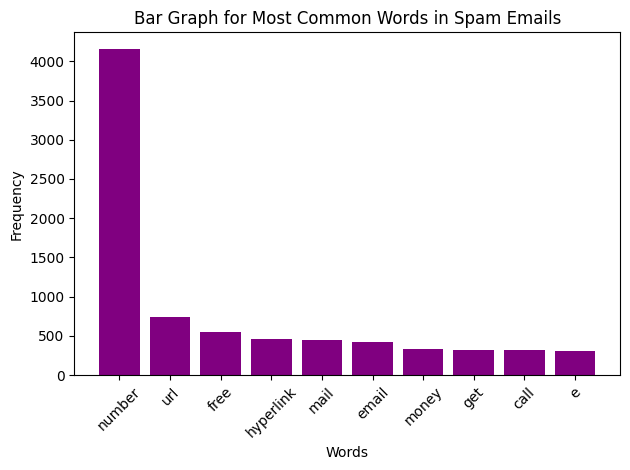

In [52]:
words, counts = zip(*most_common_words)
plt.bar(words, counts, color='purple')
plt.title('Bar Graph for Most Common Words in Spam Emails')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
train_data.label.value_counts()

ham     4739
spam     786
Name: label, dtype: int64

In [54]:
count_class_0, count_class_1 = train_data.label.value_counts()

In [56]:
train_data_class_0 = train_data[train_data['label'] == 'ham']
train_data_class_1 = train_data[train_data['label'] == 'spam']

In [57]:
train_data_class_0_class_1_over = train_data_class_1.sample(count_class_0, replace=True)
train_data_test_over = pd.concat([train_data_class_0, train_data_class_0_class_1_over], axis=0)

In [58]:
train_data_test_over.label.value_counts()

ham     4739
spam    4739
Name: label, dtype: int64

In [59]:
train_data = train_data_test_over

In [31]:
train_data['label'] = train_data['label'].apply(lambda x: 0 if x == 'ham' else 1)

In [32]:
test_data['label'] = test_data['label'].apply(lambda x: 0 if x == 'ham' else 1)

In [33]:
train_data.head()

,label,email,length,num_words,num_sentence
0,1,attn i am bulawa mulete jr the son of mr steve...,2852,522,1
1,0,That depends. How would you like to be treated...,50,10,3
2,0,"Wen u miss someone, the person is definitely s...",141,25,2
3,1,Win the newest “Harry Potter and the Order of ...,138,26,1
4,0,Where are you lover ? I need you ...,36,9,2


In [34]:
test_data.head()

,label,email
0,0,Why you keeping me away like this
1,0,neale pickett if you can spare the memory you...
2,0,I think u have the wrong number.
3,0,* Was thinking about chuckin ur red green n bl...
4,0,i am trying to manage the email for a domain w...


In [35]:
test_data.label.value_counts()

0    2467
1     422
Name: label, dtype: int64

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
from sklearn.model_selection import train_test_split

tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(train_data['email']).toarray()
y_train = train_data['label']
X_test = tfidf.fit_transform(test_data['email']).toarray()
y_test = test_data['label']

<span style="font-size: 30px;">**<span style="color:purple;">BUILDING A MODEL
</span>**</span>

In [62]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

model_params = {
    'svm': {
        'model': SVC(),
        'params' : {
            'C': [1,10,100],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'naive_bayes' : {
        'model': MultinomialNB(),
        'params': {
            'alpha': [1, 0.1, 0.01]
        }
    }
}

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, f1_score

In [41]:
from sklearn.model_selection import GridSearchCV
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.979005,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.962896,{'n_estimators': 10}
2,naive_bayes,0.970136,{'alpha': 0.1}


In [39]:
from sklearn.svm import SVC
# best_clf = SVC(C=1, kernel='linear')
best_clf = SVC()

In [ ]:
best_clf.fit(X_train, y_train)

In [76]:
y_pred = best_clf.predict(X_test)

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      2467
           1       0.30      0.11      0.16       422

    accuracy                           0.83      2889
   macro avg       0.58      0.53      0.54      2889
weighted avg       0.78      0.83      0.80      2889



In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      2467
           1       0.50      0.33      0.40       422

    accuracy                           0.85      2889
   macro avg       0.70      0.64      0.66      2889
weighted avg       0.83      0.85      0.84      2889



In [42]:
best_estimators

{'svm': SVC(C=1, kernel='linear'),
 'random_forest': RandomForestClassifier(n_estimators=10),
 'naive_bayes': MultinomialNB(alpha=0.1)}

In [43]:
best_clf = best_estimators['svm']

In [44]:
y_pred = best_clf.predict(X_test)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2467
           1       0.50      0.01      0.01       422

    accuracy                           0.85      2889
   macro avg       0.68      0.50      0.47      2889
weighted avg       0.80      0.85      0.79      2889



In [57]:
precision_score(y_test, y_pred)

0.5

In [58]:
confusion_matrix(y_test, y_pred)

array([[2464,    3],
       [ 419,    3]], dtype=int64)

In [160]:
print(classification_report(y_true, y_pred)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2467
           1       0.67      0.01      0.02       422

    accuracy                           0.85      2889
   macro avg       0.76      0.50      0.47      2889
weighted avg       0.83      0.85      0.79      2889

